In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

### Задание 1

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
red = (1,3,5,7,9,12,14,16,18,21,23,25,27,30,32,34,36)
black = (2,4,6,8,10,11,13,15,17,19,20,22,24,26,28,29,31,33,35)
green = 0

In [3]:
def roll():
    spin = random.randint(0,36)
    if spin == 0:
        return "zero"
    elif spin in red:
        return str(spin) + " red"
    else:
        return str(spin) + " black"

In [4]:
print(roll())
print(roll())
print(roll())
print(roll())
print(roll())

9 red
14 red
22 black
11 black
16 red


### Задание 2

2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки.

In [5]:
def coin():
    return random.randint(0,1)

In [6]:
n = 1000000
l = [coin() for i in range(n)]
p0 = np.sum(np.array(l) == 0) / n
p1 = np.sum(np.array(l) == 1) / n
print(p0, "+", p1, "=", p0+p1)

0.500257 + 0.499743 = 1.0


2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+…+х9.

In [7]:
n = 1000
x = []
for i in range(10):
    x.append(np.random.uniform(size=n))

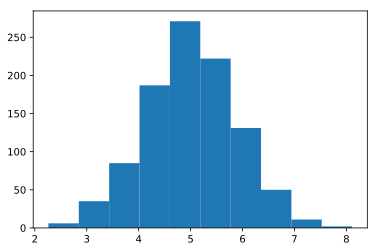

In [8]:
s = np.sum(x, axis=0)
plt.hist(s, bins=10)
plt.show()

### Задание 3

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [9]:
k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

37263 100000 0.37263


In [10]:
c = binom(4, 2)
print(c / pow(2, 4))

0.375


3.2 Повторите расчеты, взяв другие значения n и k.

In [11]:
k, n = 0, 100000
m, j = 10, 10
x = []
for i in range(m):
    x.append(np.random.randint(0, 2, size=n))
s = np.sum(x, axis=0)
for i in range(0, n):
    if s[i] == j:
        k = k + 1
print(k, n, k/n)

100 100000 0.001


In [12]:
c = binom(m, j)
print(c / pow(2, m))   

0.0009765625


### Задание 4

Дополните код расчетом коэффициента корреляции x и y по формуле.

0.4932374263052762 0.25360975335117875
0.493237426305277 0.25360975335117847


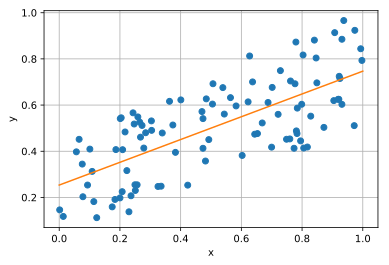

In [13]:
n = 100
r = 0.5
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [14]:
mean_x = np.mean(x)
mean_y = np.mean(y)
r = np.sum((x-mean_x)*(y-mean_y))/np.sqrt(np.sum((x-mean_x)**2)*np.sum((y-mean_y)**2))
print(r)
print(np.corrcoef(x, y)[0,1])

0.7196678199496208
0.7196678199496211
